In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

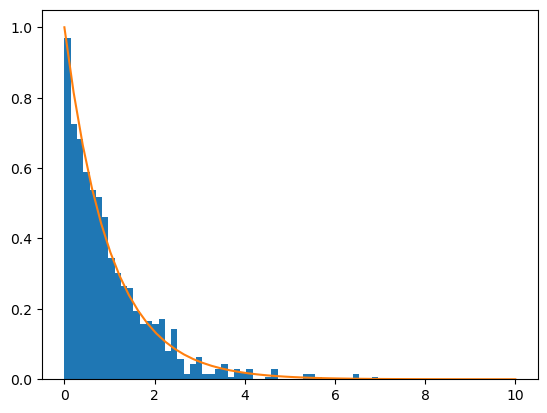

In [11]:
dist = sp.stats.gamma(1)
sample = dist.rvs(size=1000)
plt.hist(sample, bins=50, density=True)
x = np.linspace(0, 10)
plt.plot(x, dist.pdf(x))
plt.show()

In [12]:
#stimo il parametro di forma
forma = sp.stats.gamma.fit(sample)
forma

(np.float64(0.9722848106244966),
 np.float64(0.0013402456049089967),
 np.float64(1.0159595422059673))

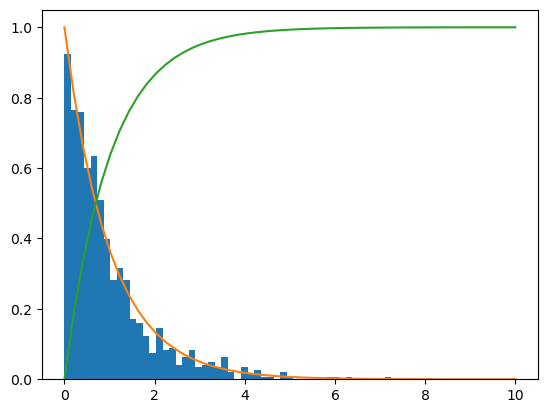

0.9636961430476669


In [14]:
dist = sp.stats.gamma(1)
sample = dist.rvs(size=1000)
plt.hist(sample, bins=50, density=True)
x = np.linspace(0, 10)
plt.plot(x, dist.pdf(x))
plt.plot(x, dist.cdf(x))
plt.show()
print(np.var(sample))

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

Text(0, 0.5, 'Min and max temperature')

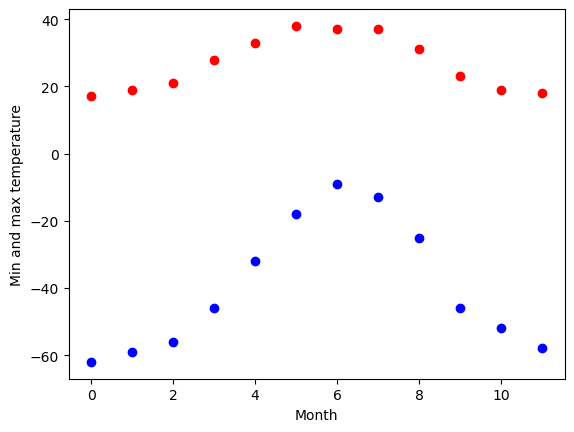

In [14]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")


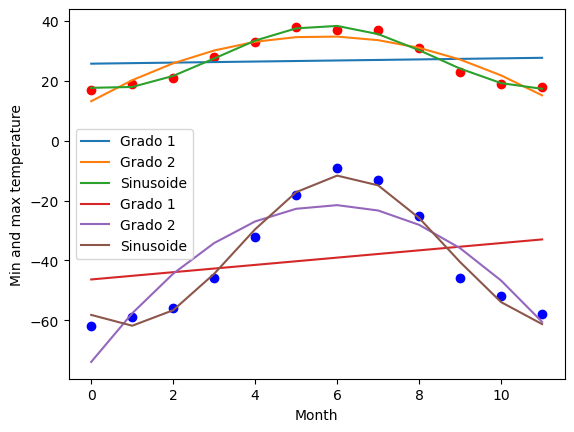

Errori per il massimo
MAE e RMSE grado 1: (np.float64(7.25), np.float64(7.797984767461811))
MAE e RMSE grado 2: (np.float64(2.5817932067932063), np.float64(2.9601604601862284))
MAE e RMSE sinusoide: (np.float64(0.7720553267285496), np.float64(0.8479022664866712))
Errori per il minimo
MAE e RMSE grado 1: (np.float64(16.38189588189588), np.float64(18.00681904850305))
MAE e RMSE grado 2: (np.float64(7.52097902097902), np.float64(8.533903317211053))
MAE e RMSE sinusoide: (np.float64(2.3410103468003065), np.float64(2.6972767170551513))


In [8]:
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)

#temperature massime
#fit di grado 1
max_grado1 = np.polyfit(months, temp_max, deg=1)#deg=1 retta
ypred_grado1 = np.polyval(max_grado1, months)
#fit di grado 2
max_grado2 = np.polyfit(months, temp_max, deg=2)
ypred_grado2 = np.polyval(max_grado2, months)
#provo una sinusoide
def sinusoide(x, a, b, c, d):
    return a * np.sin(b * (x + c)) + d
popt_tmax, _ = sp.optimize.curve_fit(sinusoide, months, temp_max)
ypred_seno = sinusoide(months, *popt_tmax)

#calcolo MAE e RMSE
def calcola_errori(yvere, ypred):
    mae = np.mean(np.abs(yvere - ypred))
    rmse = np.sqrt(np.mean((yvere - ypred)**2))
    return mae, rmse

#ora stessa cosa per temperature minime
#fit di grado 1
min_grado1 = np.polyfit(months, temp_min, deg=1)#deg=1 retta
ypredmin_grado1 = np.polyval(min_grado1, months)#def=2 parabola
#fit di grado 2
min_grado2 = np.polyfit(months, temp_min, deg=2)
ypredmin_grado2 = np.polyval(min_grado2, months)
#provo una sinusoide
popt_tmin, _ = sp.optimize.curve_fit(sinusoide, months, temp_min, p0=[10, 2*np.pi/12, 0, -30])
ypredmin_seno = sinusoide(months, *popt_tmin)

plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
plt.plot(months, ypred_grado1, label="Grado 1")
plt.plot(months, ypred_grado2, label="Grado 2")
plt.plot(months, ypred_seno, label="Sinusoide")
plt.plot(months, ypredmin_grado1, label="Grado 1")
plt.plot(months, ypredmin_grado2, label="Grado 2")
plt.plot(months, ypredmin_seno, label="Sinusoide")
plt.legend()
plt.show()

print("Errori per il massimo")
print(f'MAE e RMSE grado 1: {calcola_errori(temp_max, ypred_grado1)}')
print(f'MAE e RMSE grado 2: {calcola_errori(temp_max, ypred_grado2)}')
print(f'MAE e RMSE sinusoide: {calcola_errori(temp_max, ypred_seno)}')

print("Errori per il minimo")
print(f'MAE e RMSE grado 1: {calcola_errori(temp_min, ypredmin_grado1)}')
print(f'MAE e RMSE grado 2: {calcola_errori(temp_min, ypredmin_grado2)}')
print(f'MAE e RMSE sinusoide: {calcola_errori(temp_min, ypredmin_seno)}')

### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

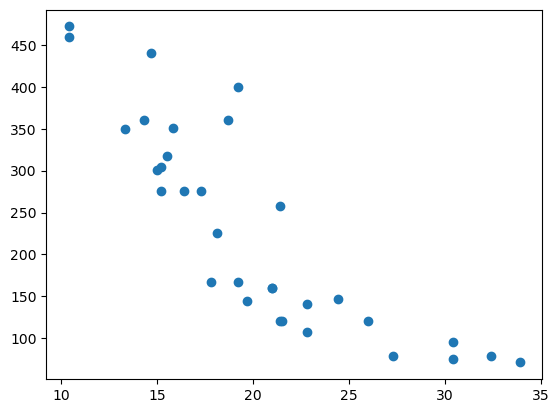

In [12]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df

#prima di tutto vedo come sono distribuiti
y = df['disp']
x = df['mpg']

plt.scatter(x, y)
plt.show()

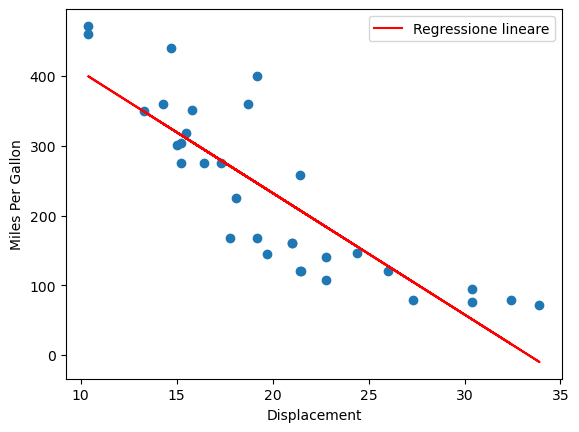

MAE e RMSE: (np.float64(53.20774057510479), np.float64(64.74001336626779))


In [13]:
#ora faccio la regressione
y = df['disp']
x = df['mpg']


def lineare(x, m, q):
    return m*x + q

popt, _ = sp.optimize.curve_fit(lineare, x, y)
ypred = lineare(x, *popt)

def calcola_errori(yvere, ypred):
    mae = np.mean(np.abs(yvere - ypred))
    rmse = np.sqrt(np.mean((yvere - ypred)**2))
    return mae, rmse

plt.scatter(x, y)
plt.plot(x, ypred, label="Regressione lineare", color='red')
plt.legend()
plt.xlabel("Displacement")
plt.ylabel("Miles Per Gallon")
plt.show()

print(f'MAE e RMSE: {calcola_errori(y, ypred)}')